###  Virtual Football League Prediction With RL

In [1]:
from keras import backend as K
from __future__ import division, print_function 
from keras.callbacks import ModelCheckpoint 
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation,Flatten
from keras.optimizers import SGD,Adam,RMSprop
from keras.utils import np_utils
import numpy as np
import pylab as plt
import numpy as np
import matplotlib.pyplot as plt
import os 

/home/gsociety/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using Theano backend.


In [155]:
class Policy():
    
    def policy1(self,a,env_f):
        self.env_f = env_f
        self.rr = 0
        self.new_s = 0
        
        #Policy definition defining reward
        if self.env_f == [0,0,0] and a =='1':
            self.rr = 0
            self.new_s = 0
        elif self.env_f == [0,0,0] and a =='0':
            self.rr = 0
            self.new_s = 0
             ###################
        elif self.env_f == [0,0,1] and a =='1':
            self.rr = 50
            self.new_s = 1
        elif self.env_f == [0,0,1] and a =='0':
            self.rr = 2
            self.new_s = 1
            #################
        elif self.env_f == [0,1,0] and a =='1':
            self.rr = 0
            self.new_s = 2
        elif self.env_f == [0,1,0] and a =='0':
            self.rr =  12
            self.new_s = 2
           #############
        
        elif self.env_f == [0,1,1] and a =='1':
            self.rr = 3
            self.new_s = 3
        elif self.env_f == [0,1,1] and a =='0':
            self.rr =  1
            self.new_s = 3
            #####lll
            
        elif self.env_f == [1,0,0] and a =='1':
            self.rr = 5
            self.new_s = 0
        elif self.env_f == [1,0,0] and a =='0':
            self.rr = 0
            self.new_s = 0
            
        elif self.env_f == [1,0,1] and a =='1':
            self.rr = 3
            self.new_s = 1
        elif self.env_f == [1,0,1] and a =='0':
            self.rr = 1
            self.new_s = 1
            ###############
        elif self.env_f == [1,1,0] and a =='1':
            self.rr = 9
            self.new_s = 2
        elif self.env_f == [1,1,0] and a =='0':
            self.rr = 0
            self.new_s = 2
            #########
        elif self.env_f == [1,1,1] and a =='1':
            self.rr = 7
            self.new_s = 3
        elif self.env_f == [1,1,1] and a =='0':
            self.rr = 1
            self.new_s = 3
        
        return self.rr ,self.new_s
        
        
    
    def policy2(self,a,env_f):
        self.env_f = env_F
        pass
    


class GBetEnv():
    counter = 0
    def __init__(self,t_env_list,policy):
        self.t_env = t_env_list
        self.policy = policy
        
        
    
    
    def r_action(self,a):
        GBetEnv.counter += 1
        b = GBetEnv.counter - 1
        e = GBetEnv.counter + 1
        #new_s = self.t_env[b:e]
        new_s1 = self.t_env[b:e+1]
        #new_s = GBetEnv.counter
       
        
        #print(GBetEnv.counter)
        #print(self.t_env)
       # print('NEW_S:',new_s1)
        #print(new_s1)
        r,new_s = self.policy.policy1(a,new_s1)
        
        done = True
        
        return new_s ,r,done
        
    def reset(self):
        GBetEnv.counter = 0
        
        return int(GBetEnv.counter)
    

In [156]:
np.random.seed(200)
ss = [np.random.randint(0,2) for val in range(100)] 
policy = Policy()
g_env = GBetEnv(ss,policy) 
g_env.reset()

0

In [157]:
#naive_sum_reward_agent(g_env,num_episodes = 100)

In [158]:


# data: shuffled and split between train and test sets
#(X_train, y_train), (X_test, y_test) = mnist.load_data()
#(x_train, y_train), (x_test, y_test)=vfl_data(t,10)

#X_train is 60000 rows of 28x28 values --> reshaped in 60000 x 784

#np.random.seed(1671) # for reproducibility

In [159]:

# network and training 
NB_EPOCH = 1
BATCH_SIZE = 1
MODEL_DIR = "/home/gsociety/Desktop/The Model/STORAGE/MODELS/DENSE"
VERBOSE = 1
NB_CLASSES = 2 # number of outputs = number of digits
OPTIMIZER =Adam() #SGD() # optimizer, explained later in this chapter
N_HIDDEN = 80
#N_HIDDEN1 =200
#INITIAL_EPOCH = 0
VALIDATION_SPLIT=0.25 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.05
RESHAPED = 5

In [160]:

# M_HIDDEN hidden layers 10 outputs
model = Sequential()

model.add(Dense(N_HIDDEN, input_shape=(5,)))
model.add(Activation('relu'))
#model.add(Dropout(DROPOUT))
#model.add(Dense(N_HIDDEN1))
#model.add(Activation('relu'))
#model.add(Dropout(DROPOUT))
#model.add(Dense(NB_CLASSES))
#model.add(Dense(N_HIDDEN2))
#model.add(Activation('relu'))
#model.add(Dropout(DROPOUT))
model.add(Dense(NB_CLASSES))
model.add(Activation('linear'))
#model.summary()

model.compile(loss='mse',optimizer=OPTIMIZER,metrics=['mae',])

In [161]:

#inpp = np.identity(5)[2:3]
#inpp = inpp.reshape(inpp.shape[0], 5)

model.predict(np.identity(5)[2:3])


array([[-0.01476705, -0.03894807]], dtype=float32)

In [197]:
from time import sleep


num_episodes = 5
y = 0.3
eps = 0.8
#lr = 0.8
r_avg_list= []
decay_factor = 0.998
g_env.reset()
#s = 0
s = g_env.reset()
for i in range(num_episodes):
   
    if i % 50 == 0:
        sleep(2)
        print("Episode {} of {}".format(i +1,num_episodes))
        
    eps *= decay_factor
    done = False
    r_sum = 0

    while not done:
        #sleep(1)
        if np.random.random() < eps:
            a = str(np.random.randint(0,2))
        else:
            a = str(np.argmax(model.predict(np.identity(5)[s:s+1])))

        new_s ,r,done = g_env.r_action(a)
      
       # print(r)
        a = int(a)
        #print(a)
        #print(np.identity(5)[new_s:new_s+1])
        target = r + y*np.max(model.predict(np.identity(5)[new_s:new_s+1]))
        target_vec = model.predict(np.identity(5)[s:s+1])[0]
        print('target_vec',target_vec)
        
        target_vec[a] = target
        
        model.fit(np.identity(5)[s:s+1] ,target_vec.reshape(-1,2),epochs=1,verbose=0)
        s = new_s 
        r_sum += r
                               
    r_avg_list.append(r_sum)
                               


Episode 1 of 5
target_vec [ 5.2798986 13.568559 ]
[[ 5.2798986 13.568559 ]]
target_vec [3.6338365 9.513368 ]
[[3.6338365 9.513368 ]]
target_vec [ 5.285575 13.613992]
[[ 5.285575 13.613992]]
target_vec [ 5.2865005 13.623769 ]
[[ 5.2865005 13.623769 ]]
target_vec [7.738424  7.7918453]
[[7.738424  7.7918453]]


In [172]:
 #r_avg_list

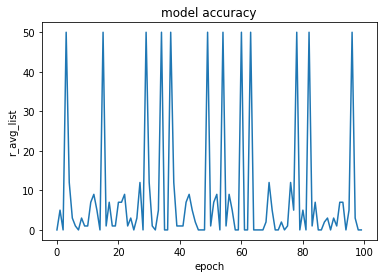

In [174]:
# list all data in history

# summarize history for accuracy
plt.plot(r_avg_list)

plt.title('model accuracy')
plt.ylabel('r_avg_list')
plt.xlabel('epoch')

plt.show()

In [192]:
pr = np.array([[0., 0., 0., 0., 0.]])
pr

array([[0., 0., 0., 0., 0.]])

In [193]:
model.predict(pr)

array([[2.4956005, 5.920324 ]], dtype=float32)